<a href="https://colab.research.google.com/github/tikutaku69/colab_tamesi/blob/main/3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

リスト3.24

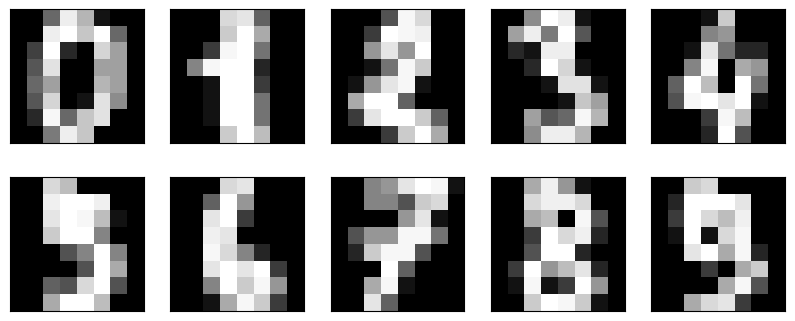

データの形状: (1797, 64)
ラベル: [0 1 2 3 4 5 6 7 8 9]


In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()

n_img = 10  # 表示する画像の数
plt.figure(figsize=(10, 4))
for i in range(n_img):
    ax = plt.subplot(2, 5, i+1)
    ax.imshow(digits_data.data[i].reshape(8, 8), cmap="Greys_r")
    ax.get_xaxis().set_visible(False)  # 軸を非表示に
    ax.get_yaxis().set_visible(False)
plt.show()

print("データの形状:", digits_data.data.shape)
print("ラベル:", digits_data.target[:n_img])

リスト3.25

In [8]:
import torch
from sklearn.model_selection import train_test_split

digit_images = digits_data.data
labels = digits_data.target
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels)  # 25%がテスト用

# Tensorに変換
x_train = torch.tensor(x_train, dtype=torch.float32)  # 入力: 訓練用
t_train = torch.tensor(t_train, dtype=torch.int64)  # 正解: 訓練用
x_test = torch.tensor(x_test, dtype=torch.float32)  # 入力: テスト用
t_test = torch.tensor(t_test, dtype=torch.int64)  # 正解: テスト用

リスト3.26

In [9]:
from torch import nn

net = nn.Sequential(
    nn.Linear(64, 32),  # 全結合層
    nn.ReLU(),          # ReLU
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


リスト3.27

In [10]:
from torch import optim

# ソフトマックス関数 + 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# SGD モデルのパラメータを渡す
optimizer = optim.SGD(net.parameters(), lr=0.01)  # 学習率は0.01

# 損失のログ
record_loss_train = []
record_loss_test = []

# 訓練データを1000回使う
for i in range(1000):

    # パラメータの勾配を0に
    optimizer.zero_grad()

    # 順伝播
    y_train = net(x_train)
    y_test = net(x_test)

    # 誤差を求めて記録する
    loss_train = loss_fnc(y_train, t_train)
    loss_test = loss_fnc(y_test, t_test)
    record_loss_train.append(loss_train.item())
    record_loss_test.append(loss_test.item())

    # 逆伝播（勾配を計算）
    loss_train.backward()

    # パラメータの更新
    optimizer.step()

    if i%100 == 0:  # 100回ごとに経過を表示
        print("Epoch:", i, "Loss_Train:", loss_train.item(), "Loss_Test:", loss_test.item())

Epoch: 0 Loss_Train: 2.6341540813446045 Loss_Test: 2.631272792816162
Epoch: 100 Loss_Train: 1.1343011856079102 Loss_Test: 1.1376826763153076
Epoch: 200 Loss_Train: 0.4456315040588379 Loss_Test: 0.43194684386253357
Epoch: 300 Loss_Train: 0.2579001486301422 Loss_Test: 0.244893878698349
Epoch: 400 Loss_Train: 0.18864646553993225 Loss_Test: 0.18171656131744385
Epoch: 500 Loss_Train: 0.1517351120710373 Loss_Test: 0.1499023735523224
Epoch: 600 Loss_Train: 0.12744678556919098 Loss_Test: 0.13093435764312744
Epoch: 700 Loss_Train: 0.10981279611587524 Loss_Test: 0.1180259957909584
Epoch: 800 Loss_Train: 0.09599489718675613 Loss_Test: 0.10860642045736313
Epoch: 900 Loss_Train: 0.08483894169330597 Loss_Test: 0.1015152707695961


リスト3.28

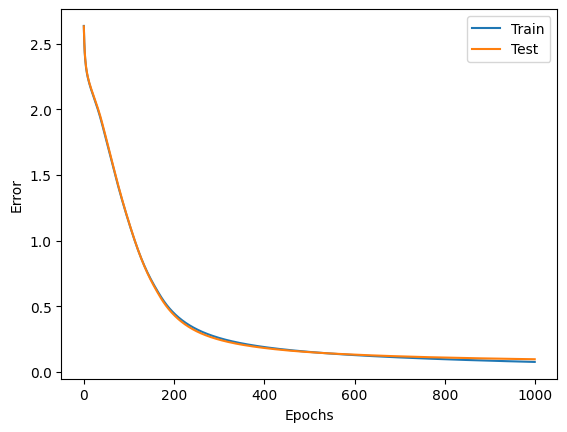

In [11]:
plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

リスト3.29

In [12]:
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print("正解率:", str(count/len(y_test)*100) + "%")

正解率: 98.22222222222223%


リスト3.30

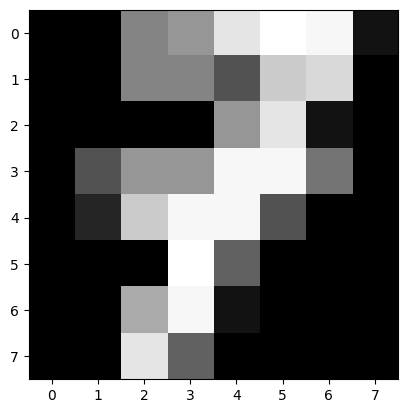

正解: 7 予測結果: 7


In [15]:
# 入力画像
img_id = 7
x_pred = digit_images[img_id]
image = x_pred.reshape(8, 8)
plt.imshow(image, cmap="Greys_r")
plt.show()

x_pred = torch.tensor(x_pred, dtype=torch.float32)
y_pred = net(x_pred)
print("正解:", labels[img_id], "予測結果:", y_pred.argmax().item())